### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import accuracy_score
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

In [3]:
#  Import and read the charity_data.csv.
application_df = pd.read_csv("./Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df1 = application_df.drop(columns = ['EIN','NAME'])

In [5]:
# Determine the number of unique values in each column.
application_df1.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [6]:
# Look at APPLICATION_TYPE value counts for binning
application_df1['APPLICATION_TYPE'].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

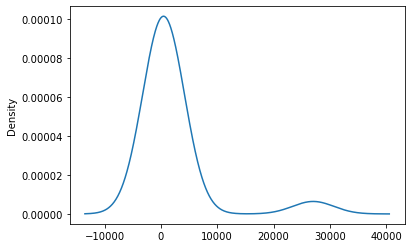

In [7]:
# Visualize the value counts of APPLICATION_TYPE
application_df1['APPLICATION_TYPE'].value_counts().plot.density()

In [8]:
# Determine which values to replace if counts are less than ...?
replace_application = application_df1['APPLICATION_TYPE'].value_counts().loc[lambda x : x<200]

# Replace in dataframe
for app in replace_application.index:
    application_df1.APPLICATION_TYPE = application_df1.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df1.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [9]:
# Look at CLASSIFICATION value counts for binning
application_df1['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

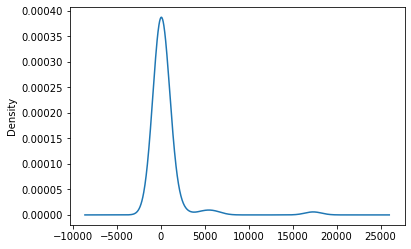

In [10]:
# Visualize the value counts of CLASSIFICATION
application_df1['CLASSIFICATION'].value_counts().plot.density()

In [11]:
# Determine which values to replace if counts are less than ..?
replace_class = application_df1['CLASSIFICATION'].value_counts().loc[lambda x: x< 1883]

# Replace in dataframe
for cls in replace_class.index:
    application_df1.CLASSIFICATION = application_df1.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df1.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [12]:
# Generate our categorical variable lists
application_cat = application_df1.dtypes[application_df1.dtypes == 'object'].index.tolist()

In [13]:
# Check the count of unique value in each categorical variable
application_df1[application_cat].nunique()

APPLICATION_TYPE          9
AFFILIATION               6
CLASSIFICATION            6
USE_CASE                  5
ORGANIZATION              4
INCOME_AMT                9
SPECIAL_CONSIDERATIONS    2
dtype: int64

In [14]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df1[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

C:\Users\yuanj\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
# Merge one-hot encoded features and drop the originals
application_df2 = application_df1.merge(encode_df,left_index = True, right_index = True)
application_df2 = application_df2.drop(columns = application_cat)
application_df2.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
# Split our preprocessed data into our features and target arrays
y = application_df2['IS_SUCCESSFUL']
X = application_df2.drop(columns = 'IS_SUCCESSFUL')

# Split the preprocessed data into a training and testing dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42, stratify = y)

In [17]:
Counter(y)

Counter({1: 18261, 0: 16038})

In [18]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [19]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
number_of_features = len(X_train_scaled[0])
first_layer_unit = 80
second_layer_unit = 30
first_activation = 'relu'
second_activation = 'relu'

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units = first_layer_unit,input_dim = number_of_features,activation = first_activation))

# Second hidden layer
nn.add(
    tf.keras.layers.Dense(units = second_layer_unit,activation = second_activation))

# Output layer
nn.add(
    tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3520      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [21]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints/before_optimization/",exist_ok=True)
checkpoint_path = "checkpoints/before_optimization/weights.{epoch:02d}.hdf5"

In [22]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    period = 5)

In [23]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs = 50,callbacks=[cp_callback])

Epoch 1/50
804/804 [==============================] - 5s 3ms/step - loss: 0.5708 - accuracy: 0.7202
Epoch 2/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5566 - accuracy: 0.7301
Epoch 3/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5526 - accuracy: 0.7324
Epoch 4/50
804/804 [==============================] - 3s 3ms/step - loss: 0.5506 - accuracy: 0.7322
Epoch 5/50
799/804 [============================>.] - ETA: 0s - loss: 0.5493 - accuracy: 0.7330
Epoch 5: saving model to checkpoints/before_optimization\weights.05.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5493 - accuracy: 0.7331
Epoch 6/50
804/804 [==============================] - 3s 3ms/step - loss: 0.5488 - accuracy: 0.7351
Epoch 7/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5472 - accuracy: 0.7347
Epoch 8/50
804/804 [==============================] - 3s 3ms/step - loss: 0.5469 - accuracy: 0.7361
Epoch 9/50
804/804 [======================

In [24]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5566 - accuracy: 0.7256 - 1s/epoch - 4ms/step
Loss: 0.5566270351409912, Accuracy: 0.7255976796150208


In [25]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity.h5")

### Deliverable 3: Optimization

Analyze feature importance using GradientBoostingClassifier.
<br> Conclusion: The least important features are "STATUS" and "SPECIAL_CONSIDERATION". Consider remove these 2 columns.

In [26]:
# choose the best learning rate
from sklearn.ensemble import GradientBoostingClassifier
# Create a classifier object
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    classifier = GradientBoostingClassifier(n_estimators=20,
                                            learning_rate=learning_rate,
                                            max_features=5,
                                            max_depth=3,
                                            random_state=0)

    # Fit the model
    classifier.fit(X_train_scaled, y_train)
    print("Learning rate: ", learning_rate)

    # Score the model
    print("Accuracy score (training): {0:.3f}".format(
        classifier.score(
            X_train_scaled,
            y_train)))
    print("Accuracy score (validation): {0:.3f}".format(
        classifier.score(
            X_test_scaled,
            y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.726
Accuracy score (validation): 0.718

Learning rate:  0.1
Accuracy score (training): 0.723
Accuracy score (validation): 0.716

Learning rate:  0.25
Accuracy score (training): 0.725
Accuracy score (validation): 0.717

Learning rate:  0.5
Accuracy score (training): 0.729
Accuracy score (validation): 0.719

Learning rate:  0.75
Accuracy score (training): 0.729
Accuracy score (validation): 0.721

Learning rate:  1
Accuracy score (training): 0.728
Accuracy score (validation): 0.719



In [27]:
# Choose a learning rate and create classifier
classifier = GradientBoostingClassifier(n_estimators=20,
                                        learning_rate=0.75,
                                        max_features=5,
                                        max_depth=3,
                                        random_state=0)

# Fit the model
classifier.fit(X_train_scaled, y_train)

# Make Prediction
predictions = classifier.predict(X_test_scaled)
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).head(20)

,Prediction,Actual
13190,0,0
1765,0,0
7432,1,1
4643,0,0
25808,0,0
27367,1,1
26593,0,0
13010,0,0
2779,0,0
28001,0,0


In [28]:
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)
print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.720932944606414


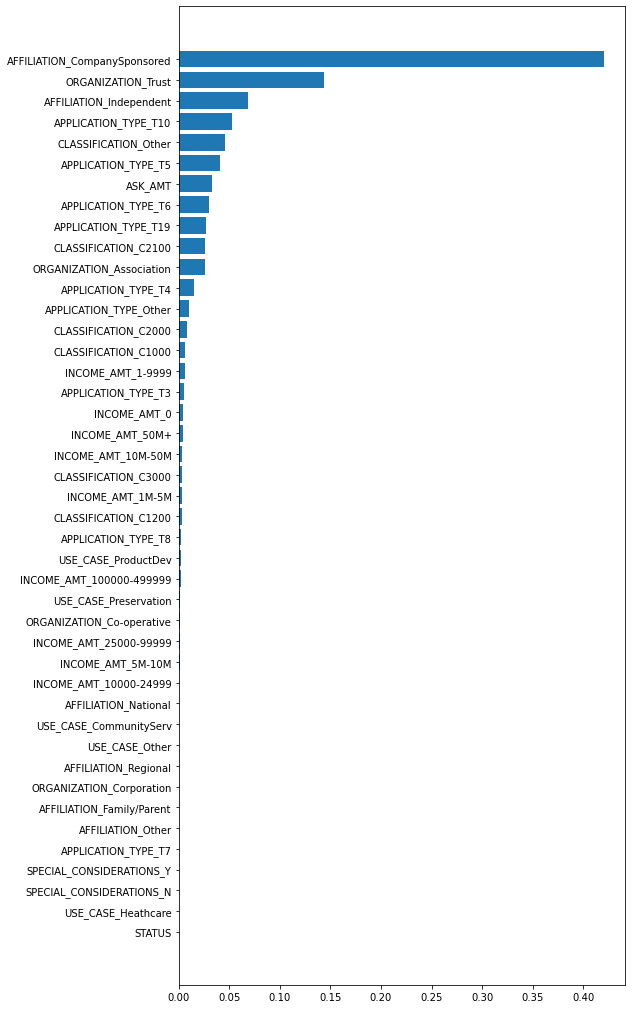

In [29]:
# Extract feature importances from the fitted gradient boosting model
feature_importances = classifier.feature_importances_

# Get the indices of the largest to smallest feature importances
# sorted_index = np.argsort(feature_importances)[::-1]
sorted_index = np.argsort(feature_importances)
# x = range(X.shape[1])
x = np.arange(sorted_index.shape[0]) + .5
# Create tick labels 
labels = np.array(X.columns)[sorted_index]
plt.figure(figsize=(8, 18))
plt.barh(x, feature_importances[sorted_index], tick_label=labels)

# Set the tick lables to be the feature names, according to the sorted feature_idx
plt.yticks()
plt.show()

### First attempt: remove "STATUS" and "SPECIAL_CONSIDERATION"
<br>Result: The accuracy score: 0.726413, which remains at the same level.

In [30]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME','STATUS','SPECIAL_CONSIDERATION'
Optimization_df = application_df.drop(columns = ['EIN','NAME',"STATUS",'SPECIAL_CONSIDERATIONS'])

In [31]:
# Determine the number of unique values in each column.
Optimization_df.nunique()

APPLICATION_TYPE      17
AFFILIATION            6
CLASSIFICATION        71
USE_CASE               5
ORGANIZATION           4
INCOME_AMT             9
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64

In [32]:
# Look at APPLICATION_TYPE value counts for binning
Optimization_df['APPLICATION_TYPE'].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [33]:
# Determine which values to replace if counts are less than ...?
replace_application = Optimization_df['APPLICATION_TYPE'].value_counts().loc[lambda x : x<200]

# Replace in dataframe
for app in replace_application.index:
    Optimization_df.APPLICATION_TYPE = Optimization_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
Optimization_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [34]:
# Look at CLASSIFICATION value counts for binning
Optimization_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [35]:
# Determine which values to replace if counts are less than ..?
replace_class = Optimization_df['CLASSIFICATION'].value_counts().loc[lambda x: x< 1883]

# Replace in dataframe
for cls in replace_class.index:
    Optimization_df.CLASSIFICATION = Optimization_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
Optimization_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [36]:
# Generate our categorical variable lists
Optimization_cat = Optimization_df.dtypes[application_df1.dtypes == 'object'].index.tolist()

In [37]:
# Check the count of unique value in each categorical variable
Optimization_df[Optimization_cat].nunique()

APPLICATION_TYPE    9
AFFILIATION         6
CLASSIFICATION      6
USE_CASE            5
ORGANIZATION        4
INCOME_AMT          9
dtype: int64

In [38]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode1_df = pd.DataFrame(enc.fit_transform(Optimization_df[Optimization_cat]))

# Add the encoded variable names to the dataframe
encode1_df.columns = enc.get_feature_names(Optimization_cat)
encode1_df.head()

C:\Users\yuanj\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [39]:
# Merge one-hot encoded features and drop the originals
Optimization_df2 = Optimization_df.merge(encode1_df,left_index = True, right_index = True)
Optimization_df2 = Optimization_df2.drop(columns = Optimization_cat)
Optimization_df2.head()

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [40]:
# Split our preprocessed data into our features and target arrays
y = Optimization_df2['IS_SUCCESSFUL']
X = Optimization_df2.drop(columns = 'IS_SUCCESSFUL')

# Split the preprocessed data into a training and testing dataset
X_train_O,X_test_O,y_train_o,y_test_o = train_test_split(X,y,random_state = 42, stratify = y)

In [41]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler_O = scaler.fit(X_train_O)

# Scale the data
X_train_scaled_O = X_scaler_O.transform(X_train_O)
X_test_scaled_O = X_scaler_O.transform(X_test_O)

In [42]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
number_of_features = len(X_train_scaled_O[0])
first_layer_unit = 80
second_layer_unit = 30
first_activation = 'relu'
second_activation = 'relu'

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units = first_layer_unit,input_dim = number_of_features,activation = first_activation))

# Second hidden layer
nn.add(
    tf.keras.layers.Dense(units = second_layer_unit,activation = second_activation))

# Output layer
nn.add(
    tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 80)                3280      
                                                                 
 dense_4 (Dense)             (None, 30)                2430      
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,741
Trainable params: 5,741
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [44]:
# Train the model
fit_model = nn.fit(X_train_scaled_O,y_train_o,epochs = 50)

Epoch 1/50
804/804 [==============================] - 4s 3ms/step - loss: 0.5673 - accuracy: 0.7254
Epoch 2/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5546 - accuracy: 0.7301
Epoch 3/50
804/804 [==============================] - 3s 3ms/step - loss: 0.5513 - accuracy: 0.7326
Epoch 4/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5501 - accuracy: 0.7314
Epoch 5/50
804/804 [==============================] - 3s 3ms/step - loss: 0.5490 - accuracy: 0.7324
Epoch 6/50
804/804 [==============================] - 3s 3ms/step - loss: 0.5474 - accuracy: 0.7335
Epoch 7/50
804/804 [==============================] - 3s 3ms/step - loss: 0.5476 - accuracy: 0.7345
Epoch 8/50
804/804 [==============================] - 3s 3ms/step - loss: 0.5461 - accuracy: 0.7327
Epoch 9/50
804/804 [==============================] - 3s 3ms/step - loss: 0.5455 - accuracy: 0.7332
Epoch 10/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5458 - accuracy: 0.7351

In [45]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled_O,y_test_o,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5565 - accuracy: 0.7264 - 953ms/epoch - 4ms/step
Loss: 0.5565046668052673, Accuracy: 0.7264139652252197


### Second attempt: Creating more bins for rare occurrences in columns "AFFILIATION" and "ORGANIZATION"
<br>Result: The accuracy score: 0.724314, which remains at the same level.

In [46]:
# Look at AFFILIATION value counts for binning
Optimization_df['AFFILIATION'].value_counts()

Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64

In [47]:
# Determine which values to replace if counts are less than ...?
replace_affiliation = Optimization_df['AFFILIATION'].value_counts().loc[lambda x : x<100]

# Replace in dataframe
for aff in replace_affiliation.index:
    Optimization_df.AFFILIATION = Optimization_df.AFFILIATION.replace(aff,"Other")
    
# Check to make sure binning was successful
Optimization_df.AFFILIATION.value_counts()

Independent         18480
CompanySponsored    15705
Other                 114
Name: AFFILIATION, dtype: int64

In [48]:
# Look at ORGANIZATION value counts for binning
Optimization_df['ORGANIZATION'].value_counts()

Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: ORGANIZATION, dtype: int64

In [49]:
# Determine which values to replace if counts are less than ...?
replace_org = Optimization_df['ORGANIZATION'].value_counts().loc[lambda x : x<500]

# Replace in dataframe
for org in replace_org.index:
    Optimization_df.ORGANIZATION = Optimization_df.ORGANIZATION.replace(org,"Other")
    
# Check to make sure binning was successful
Optimization_df.ORGANIZATION.value_counts()

Trust          23515
Association    10255
Other            529
Name: ORGANIZATION, dtype: int64

In [50]:
# Re-generate our categorical variable lists
Optimization_cat1 = Optimization_df.dtypes[Optimization_df.dtypes == 'object'].index.tolist()

In [51]:
# Check the count of unique value in each categorical variable
Optimization_df[Optimization_cat1].nunique()

APPLICATION_TYPE    9
AFFILIATION         3
CLASSIFICATION      6
USE_CASE            5
ORGANIZATION        3
INCOME_AMT          9
dtype: int64

In [52]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode2_df = pd.DataFrame(enc.fit_transform(Optimization_df[Optimization_cat1]))

# Add the encoded variable names to the dataframe
encode2_df.columns = enc.get_feature_names(Optimization_cat1)
encode2_df.head()

C:\Users\yuanj\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [53]:
# Merge one-hot encoded features and drop the originals
Optimization_df_2 = Optimization_df.merge(encode2_df,left_index = True, right_index = True)
Optimization_df_2 = Optimization_df_2.drop(columns = Optimization_cat1)
Optimization_df_2.head()

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [54]:
# Split our preprocessed data into our features and target arrays
y_o2 = Optimization_df_2['IS_SUCCESSFUL']
X_O2 = Optimization_df_2.drop(columns = 'IS_SUCCESSFUL')

# Split the preprocessed data into a training and testing dataset
X_train_O2,X_test_O2,y_train_o2,y_test_o2 = train_test_split(X_O2,y_o2,random_state = 42, stratify = y)

In [55]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler_O2 = scaler.fit(X_train_O2)

# Scale the data
X_train_scaled_O2 = X_scaler_O2.transform(X_train_O2)
X_test_scaled_O2 = X_scaler_O2.transform(X_test_O2)

In [56]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
number_of_features2 = len(X_train_scaled_O2[0])
first_layer_unit2 = 80
second_layer_unit2 = 30
first_activation2 = 'relu'
second_activation2 = 'relu'

nn_2 = tf.keras.models.Sequential()

# First hidden layer
nn_2.add(
    tf.keras.layers.Dense(units = first_layer_unit2,input_dim = number_of_features2,activation = first_activation2))

# Second hidden layer
nn_2.add(
    tf.keras.layers.Dense(units = second_layer_unit2,activation = second_activation2))

# Output layer
nn_2.add(
    tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

# Check the structure of the model
nn_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 80)                2960      
                                                                 
 dense_7 (Dense)             (None, 30)                2430      
                                                                 
 dense_8 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,421
Trainable params: 5,421
Non-trainable params: 0
_________________________________________________________________


In [57]:
# Compile the model
nn_2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [58]:
# Train the model
fit_model = nn.fit(X_train_scaled_O2,y_train_o2,epochs = 50)

Epoch 1/50
804/804 [==============================] - 4s 3ms/step - loss: 0.5688 - accuracy: 0.7229
Epoch 2/50
804/804 [==============================] - 3s 3ms/step - loss: 0.5539 - accuracy: 0.7293
Epoch 3/50
804/804 [==============================] - 3s 3ms/step - loss: 0.5513 - accuracy: 0.7321
Epoch 4/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5496 - accuracy: 0.7334
Epoch 5/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5495 - accuracy: 0.7332
Epoch 6/50
804/804 [==============================] - 3s 3ms/step - loss: 0.5480 - accuracy: 0.7332
Epoch 7/50
804/804 [==============================] - 3s 3ms/step - loss: 0.5469 - accuracy: 0.7337
Epoch 8/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5468 - accuracy: 0.7345
Epoch 9/50
804/804 [==============================] - 3s 3ms/step - loss: 0.5459 - accuracy: 0.7357
Epoch 10/50
804/804 [==============================] - 3s 3ms/step - loss: 0.5449 - accuracy: 0.7354

In [59]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled_O2,y_test_o2,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5558 - accuracy: 0.7252 - 852ms/epoch - 3ms/step
Loss: 0.5557706952095032, Accuracy: 0.7252478003501892


### Third attempt: Use the function to figure out the optimized combination of activation and neurons; 
### Use Sigmoid function and 3 layers have the best accuracy rate. Increase Epochs to 100;
<br>Result: The accuracy score: 0.724431, which remains at the same level.

In [60]:
# Copy the dataframe
Optimization_df_3 = Optimization_df_2

In [61]:
# Split our preprocessed data into our features and target arrays
y_o3 = Optimization_df_3['IS_SUCCESSFUL']
X_O3 = Optimization_df_3.drop(columns = 'IS_SUCCESSFUL')

# Split the preprocessed data into a training and testing dataset
X_train_O3,X_test_O3,y_train_o3,y_test_o3 = train_test_split(X_O3,y_o3,random_state = 42, stratify = y)

In [62]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler_O3 = scaler.fit(X_train_O3)

# Scale the data
X_train_scaled_O3 = X_scaler_O3.transform(X_train_O3)
X_test_scaled_O3 = X_scaler_O3.transform(X_test_O3)

In [63]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
number_of_features3 = len(X_train_scaled_O3[0])
first_layer_unit3 = 80
second_layer_unit3 = 30
third_layer_unit3 = 10
first_activation3 = 'sigmoid'
second_activation3 = 'sigmoid'
third_activation3 = 'sigmoid'

nn_3 = tf.keras.models.Sequential()

# First hidden layer
nn_3.add(
    tf.keras.layers.Dense(units = first_layer_unit3,input_dim = number_of_features3,activation = first_activation3))

# Second hidden layer
nn_3.add(
    tf.keras.layers.Dense(units = second_layer_unit3,activation = second_activation3))

# Third hidden layer
nn_3.add(
    tf.keras.layers.Dense(units = third_layer_unit3,activation = third_activation3))

# Output layer
nn_3.add(
    tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

# Check the structure of the model
nn_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 80)                2960      
                                                                 
 dense_10 (Dense)            (None, 30)                2430      
                                                                 
 dense_11 (Dense)            (None, 10)                310       
                                                                 
 dense_12 (Dense)            (None, 1)                 11        
                                                                 
Total params: 5,711
Trainable params: 5,711
Non-trainable params: 0
_________________________________________________________________


In [64]:
# Compile the model
nn_3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [65]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints/after_optimization/",exist_ok=True)
checkpoint_path3 = "checkpoints/after_optimization/weights.{epoch:02d}.hdf5"

In [66]:
# Create a callback that saves the model's weights every epoch
cp_callback3 = ModelCheckpoint(
    filepath=checkpoint_path3,
    verbose=1,
    save_weights_only=True,
    period = 5)

In [67]:
# Train the model
fit_model = nn_3.fit(X_train_scaled_O3,y_train_o3,epochs = 100,callbacks=[cp_callback3])

Epoch 1/100
804/804 [==============================] - 4s 3ms/step - loss: 0.6011 - accuracy: 0.6984
Epoch 2/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5725 - accuracy: 0.7301
Epoch 3/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5697 - accuracy: 0.7294
Epoch 4/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5625 - accuracy: 0.7295
Epoch 5/100
802/804 [============================>.] - ETA: 0s - loss: 0.5588 - accuracy: 0.7309
Epoch 5: saving model to checkpoints/after_optimization\weights.05.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5590 - accuracy: 0.7308
Epoch 6/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5568 - accuracy: 0.7316
Epoch 7/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5559 - accuracy: 0.7329
Epoch 8/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5546 - accuracy: 0.7318
Epoch 9/100
804/804 [==============

In [68]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_3.evaluate(X_test_scaled_O3,y_test_o3,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5560 - accuracy: 0.7244 - 867ms/epoch - 3ms/step
Loss: 0.55596923828125, Accuracy: 0.7244315147399902


In [69]:
# Export our model to HDF5 file
nn_3.save("AlphabetSoupCharity_Optimization.h5")

In [ ]:
# # Create a method that creates a new Sequential model with hyperparameter options
# def create_model(hp):
#     nn_model = tf.keras.models.Sequential()

#     # Allow kerastuner to decide which activation function to use in hidden layers
#     activation = hp.Choice('activation',['relu','tanh','sigmoid'])
#     first_units = hp.Int('first_units', min_value=1, max_value=10, step=2)
    
#     # Allow kerastuner to decide number of neurons in first layer
#     nn_model.add(tf.keras.layers.Dense(units=first_units, activation=activation, input_dim=len(X_train_scaled_O2[0])))

#     # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
#     for i in range(hp.Int('num_layers', 1, 6)):
#         next_units = hp.Int('units_' + str(i), min_value=1, max_value=10, step=2)

#         nn_model.add(tf.keras.layers.Dense(units=next_units, activation=activation))
    
#     nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

#     # Compile the model
#     nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
#     # Define the checkpoint path and filenames
#     os.makedirs("checkpoints/after_optimization/",exist_ok=True)
#     checkpoint_path = "checkpoints/after_optimization/weights.{epoch:02d}.hdf5"

#     # Create a callback that saves the model's weights every epoch
#     cp_callback = ModelCheckpoint(
#     filepath=checkpoint_path,
#     verbose=1,
#     save_weights_only=True,
#     save_freq='epoch', 
#     period=5)
    
#     return nn_model

In [ ]:
# import keras_tuner as kt

# tuner = kt.Hyperband(
#     create_model, # function name
#     objective="val_accuracy",
#     max_epochs=20,
#     hyperband_iterations=2)

In [ ]:
# # Run the kerastuner search for best hyperparameters
# tuner.search(X_train_scaled_O2,y_train_o2,epochs=20,validation_data=(X_test_scaled_O2,y_test_o2))

In [ ]:
# # Get best model hyperparameters
# best_hyper = tuner.get_best_hyperparameters(1)[0]
# best_hyper.values

In [ ]:
# # Evaluate best model against full test data
# best_model = tuner.get_best_models(1)[0]
# model_loss, model_accuracy = best_model.evaluate(X_test_scaled_O2,y_test_o2,verbose=2)
# print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")